# <font color='red'> [0] Build the model and the structure of the metabolic network </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

In [2]:
model = MODEL()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [0.3] Load of an existing model </font> 

You can creat a linear network of $N$ metabolites

In [3]:
model.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


By default, the first and last metabolites are external

In [4]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW


In [5]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,True,1.0,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


And the stoichiometric matrix is build

In [6]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


You can also load model from SBML, COBRA and SBTAB with model.load...

## <font color='green'> [0.3] Change a reaction and metabolite </font> 

Modifing the dicionnary of the metabolite in the dataframe of reaction change also the dataframes of metabolites and stoichiometry

In [7]:
model.reactions.change(name="reaction_0", metabolites={'new_meta':-2, 'meta_1':1}, k_eq=1.5, reversible=False, flux=1.5)

In [8]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


In [9]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


In [10]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0
meta_2,0.0,1.0,-1.0
meta_3,0.0,0.0,1.0
new_meta,-2.0,0.0,0.0


Same for the metabolite

In [11]:
model.metabolites.change("meta_0", concentration=2.0)

In [12]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


## <font color='green'> [0.4] Add of reaction and metabolite </font> 

To add a reaction, only its name as input is indispensable, but adding a dictionnary of the metabolite used in the reaction as key linked to their stoichiometric coefficients allow the module to add automatically those metabolite to the metabolite dataframe and their coefficent to the stoichiometric matrix

In [13]:
model.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, flux=1.0)

In [14]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


#### If you add a reaction that is already in the model, it call the model.reactions.change() instead 

In [15]:
metabolite_reaction2 = {"C" : -1.0,
                       "O2"  : -1.0,
                       "CO2"  : 1.0}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction2, k_eq = 1.0, flux=1.0)

In [16]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'O2': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


Add a reaction with specified metabolite and stoichiometric coefficient automaticaly adds them to the model

In [17]:
model.N
# Same
model.Stoichio_matrix_pd

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
O2,0.0,0.0,0.0,-1.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


## <font color='green'> [0.5] Removing a reaction and metabolite </font> 

It is also possible to remove a metabolite or a reaction from the model

In [18]:
model.metabolites.remove("O2")
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
C,False,1.0,mmol/gDW
CO2,False,1.0,mmol/gDW


Removing a metabolite or a reaction remove also every mention of it in the stoichiometric matrix and elasticities matrix

Same for the mention of the metabolite on the reaction dataframe

In [19]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


In [20]:
model.N

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


In [21]:
model.reactions.remove("combustion")

In [22]:
model.reactions.remove(name="combustion")
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


## <font color='green'> [0.6] Stoichiometric matrix from an existant one </font> 

#### You can also change the stoichiometric matrix

You have 2 options :
- Attribute to the stoichiometric matrix a Pandas Dataframe, whatever the size, and the programme will create a new model based on the metabolites (rows) and reactions (columns) of the dataframe
- Attribute a numpy array, and the programme will change the value of the coefficients of the matrix

In [23]:
reactions = {'Combustion': [1. , -1., -0.5],
             'Reaction_2': [0. ,  0.,   1. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

model.Stoichio_matrix_pd = dataframe

#### And the metabolites and reactions dataframes are automatically update

In [24]:
model.N

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,1.0


In [25]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,True,1.0,mmol/gDW/h
Reaction_2,{'O2': 1.0},1.0,True,1.0,mmol/gDW/h


In [26]:
model.metabolites.df

,External,Concentration,Unit
H2O,False,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


# <font color='red'> [1] Play with the dynamic of model </font> 

In [27]:
model.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [1.1] Parameters </font> 

By default, the temperature is in the parameters dataframe

In [28]:
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


You can add any parameter with its mean values and standard deviation to represent its uncertity

In [29]:
model.parameters.add("pH", mean=7., Standard_deviation=2.)
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
pH,7.0,2.0


You can also remove a parameter

In [30]:
model.parameters.remove("Temperature")
model.parameters.df

Name of the removed parameter : Temperature


,Mean values,Standard deviation
pH,7.0,2.0


You can also consider the external metabolite as parameters of the model

In [31]:
model.parameters.add_externals()

## <font color='green'> [1.2] Enzymes </font> 

You can add enzyme to the model and liked them to reactions

In [32]:
model.enzymes.add("enzyme_test", mean=1, reaction_linked=["reaction_0", "reaction_2"])
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"


You can also use the model.enzymes.add_to_all_reaction() method to creat an enzyme linked to each reaction, with the name "enzyme_{reaction_name}"

In [33]:
model.enzymes.add_to_all_reaction()
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


In [34]:
model.enzymes.remove("enzyme_test")
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


Finaly, you can add the enzyme as parameters, they will be add with there name of enzyme + "_para"

In [35]:
model.parameters.add_enzymes()
model.parameters.df

,Mean values,Standard deviation
pH,7.0,2.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [1.3] Operons </font> 

You can create a dependendy between enzyme by specifying if they are linked by an operon

To do so, it is the parameters name of the enzyme that must be input

In [36]:
model.operons.add("operon_lactose", enzymes_linked=["enzyme_reaction_0_para", "enzyme_reaction_2_para"], mixed_covariance=0.42)
model.operons.df

,Enzymes linked,Mixed covariance,Activated
operon_lactose,"[enzyme_reaction_0_para_para, enzyme_reaction_...",0.42,True


By default, an operon is activated, you can desactivated at any moment

In [37]:
model.operons.desactivate("operon_lactose")

## <font color='green'> [1.4] Elasticity matrix of parameters </font> 

In [38]:
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,1.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,1.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.p.change() (slowest but there is a secutity to check the input)

In [39]:
model.elasticity.p.change(flux_name="reaction_0", parameter_name="enzyme_reaction_0_para", value=-2.)
model.elasticity.p.df.at["reaction_1", "enzyme_reaction_1_para"] = 3
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,-2.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,3.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


## <font color='green'> [1.5] Elasticities matrix of internal metabolites </font> 

Only the internal metabolite are in the $\varepsilon_s$ elasticiy matrix

In [40]:
model.elasticity.s.df

,meta_1,meta_2
reaction_0,0,0
reaction_1,0,0
reaction_2,0,0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.s.change() (slowest but there is a secutity to check the input)

In [41]:
model.elasticity.s.df.at["reaction_0", "meta_1"] = 1
model.elasticity.s.change("reaction_2", "meta_2", -1)
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,0
reaction_1,0,0
reaction_2,0,-1


Or by adding an entire numpy matrix of the same size

In [42]:
matrix_data = np.array([[1,-4],
                        [-2,5],
                        [3,-6]])

model.elasticity.s.df[:] = matrix_data
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,-4
reaction_1,-2,5
reaction_2,3,-6


You can make the assumption that the enzyme are half-satured, the elasticity is therefore egual to $-0.5N^T$

In [43]:
model.elasticity.s.half_satured()
model.elasticity.s.df

,meta_1,meta_2
reaction_0,-0.5,-0.0
reaction_1,0.5,-0.5
reaction_2,-0.0,0.5


# <font color='red'> [2] Post-simulation analysis </font> 

In [44]:
model.creat_linear(4)
model.parameters.add_externals()
model.enzymes.add_to_all_reaction()
model.parameters.add_enzymes()
model.parameters.remove("Temperature")
model.elasticity.s.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Name of the removed parameter : Temperature


## <font color='green'> [2.0] Structure variable </font> 

The stoichiometric matrix $N$

In [45]:
model.Stoichio_matrix_pd

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


The reduced stoichiometric matrix and the link matrix

In [46]:
L, N_r = model.Link_matrix
print("Link matrix :\n",L)
N_r

Link matrix :
 [[ 1.00000000e+00 -3.33066907e-16]
 [ 2.77555756e-16  1.00000000e+00]]


,reaction_0,reaction_1,reaction_2
meta_1,1,-1,0
meta_2,0,1,-1


## <font color='green'> [2.1] Jacobian matrix </font> 

The jacobian matrix is recompute each time there is a modification in $N$ or $E_s$, else it is stored in a cache

In [47]:
model.Jacobian

,meta_1,meta_2
meta_1,-1.0,0.5
meta_2,0.5,-1.0


In [48]:
model.Jacobian_reversed

,meta_1,meta_2
meta_1,-1.333333,-0.666667
meta_2,-0.666667,-1.333333


## <font color='green'> [2.2] MCA response coefficient </font> 

Sub element of the response matrix : $R^s_p$ and $R^v_p$

In [49]:
model.R_v_p

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333


In [50]:
model.R_s_p

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333


The entire response matrix is constitued of $R^s_p$ and $R^v_p$ as block matrix

In [51]:
model.R

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333


## <font color='green'> [2.3] Covariance, Correlation and Mutual Information </font> 


### <font color='white'> [2.3.1] Covariance</font> 

The programme can compute the covariance matrix of the model by a matrix product of the response matrix and covariance matrix of the parameters (a multivariate normal distribution independent by default) to study the transmission of information through the system

In [52]:
model.covariance

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.166667,0.166667,0.166667
meta_3_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.666667,-0.166667,-0.166667,-0.166667
enzyme_reaction_0_para,0.000000,0.000000,1.000000,0.000000,0.000000,1.333333,0.666667,0.333333,0.333333,0.333333
enzyme_reaction_1_para,0.000000,0.000000,0.000000,1.000000,0.000000,-0.666667,0.666667,0.333333,0.333333,0.333333
enzyme_reaction_2_para,0.000000,0.000000,0.000000,0.000000,1.000000,-0.666667,-1.333333,0.333333,0.333333,0.333333
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667,3.222222,1.777778,0.055556,0.055556,0.055556
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333,1.777778,3.222222,-0.055556,-0.055556,-0.055556
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889


### <font color='white'> [2.3.2] Corelation </font> 

You can therefore compute the correlation

In [53]:
model.corelation

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.371391,0.185695,0.267261,0.267261,0.267261
meta_3_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.185695,0.371391,-0.267261,-0.267261,-0.267261
enzyme_reaction_0_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.742781,0.371391,0.534522,0.534522,0.534522
enzyme_reaction_1_para,0.000000,0.000000,0.000000,1.000000,0.000000,-0.371391,0.371391,0.534522,0.534522,0.534522
enzyme_reaction_2_para,0.000000,0.000000,0.000000,0.000000,1.000000,-0.371391,-0.742781,0.534522,0.534522,0.534522
meta_1,0.371391,0.185695,0.742781,-0.371391,-0.371391,1.000000,0.551724,0.049629,0.049629,0.049629
meta_2,0.185695,0.371391,0.371391,0.371391,-0.742781,0.551724,1.000000,-0.049629,-0.049629,-0.049629
reaction_0,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000
reaction_1,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000
reaction_2,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000


### <font color='white'> [2.3.3] Entropy </font> 

In [54]:
model.entropy

,Entropy
meta_0_para,1.918939
meta_3_para,1.918939
enzyme_reaction_0_para,1.918939
enzyme_reaction_1_para,1.918939
enzyme_reaction_2_para,1.918939
meta_1,2.503974
meta_2,2.503974
reaction_0,1.446708
reaction_1,1.446708
reaction_2,1.446708


You can also study the entropy between group of elements of the model

Taking as input :
- [] -> every elements are studied individually
- dict -> name of the groups as keys and list of str of the elements as values
- list of list -> list of groups with default name

In [55]:
model.group_entropy([["meta_0_para", "meta_1"],["enzyme_reaction_0_para", "reaction_2"]])

,Entropy
group_0,3.348703
group_1,2.197410


### <font color='white'> [2.3.4] Conditional entropy </font> 

In [56]:
model.entropy_conditional

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,inf,0.918939,0.918939,0.918939,0.918939,0.844729,0.901393,0.881885,0.881885,0.881885
meta_3_para,0.918939,inf,0.918939,0.918939,0.918939,0.901393,0.844729,0.881885,0.881885,0.881885
enzyme_reaction_0_para,0.918939,0.918939,inf,0.918939,0.918939,0.517765,0.844729,0.750702,0.750702,0.750702
enzyme_reaction_1_para,0.918939,0.918939,0.918939,inf,0.918939,0.844729,0.844729,0.750702,0.750702,0.750702
enzyme_reaction_2_para,0.918939,0.918939,0.918939,0.918939,inf,0.844729,0.517765,0.750702,0.750702,0.750702
meta_1,1.429764,1.486428,1.102801,1.429764,1.429764,inf,1.322484,1.502741,1.502741,1.502741
meta_2,1.486428,1.429764,1.429764,1.429764,1.102801,1.322484,inf,1.502741,1.502741,1.502741
reaction_0,0.409654,0.409654,0.278472,0.278472,0.278472,0.445475,0.445475,inf,inf,inf
reaction_1,0.409654,0.409654,0.278472,0.278472,0.278472,0.445475,0.445475,inf,inf,inf
reaction_2,0.409654,0.409654,0.278472,0.278472,0.278472,0.445475,0.445475,inf,inf,inf


### <font color='white'> [2.3.5] Joint entropy </font> 

In [57]:
model.joint_entropy

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,inf,2.837877,2.837877,2.837877,2.837877,3.348703,3.405367,2.328592,2.328592,2.328592
meta_3_para,2.837877,inf,2.837877,2.837877,2.837877,3.405367,3.348703,2.328592,2.328592,2.328592
enzyme_reaction_0_para,2.837877,2.837877,inf,2.837877,2.837877,3.021739,3.348703,2.197410,2.197410,2.197410
enzyme_reaction_1_para,2.837877,2.837877,2.837877,inf,2.837877,3.348703,3.348703,2.197410,2.197410,2.197410
enzyme_reaction_2_para,2.837877,2.837877,2.837877,2.837877,inf,3.348703,3.021739,2.197410,2.197410,2.197410
meta_1,3.348703,3.405367,3.021739,3.348703,3.348703,inf,3.826458,2.949449,2.949449,2.949449
meta_2,3.405367,3.348703,3.348703,3.348703,3.021739,3.826458,inf,2.949449,2.949449,2.949449
reaction_0,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf
reaction_1,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf
reaction_2,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf


### <font color='white'> [2.3.6] Mutual Information </font> 

In [58]:
model.MI

/home/alequertier/Documents/BadAss/Notebooks/../main.py:604: RuntimeWarning: divide by zero encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__corelation[i][j] ** 2)


,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,inf,-0.000000,-0.000000,-0.000000,-0.000000,0.074210,0.017546,0.037054,0.037054,0.037054
meta_3_para,-0.000000,inf,-0.000000,-0.000000,-0.000000,0.017546,0.074210,0.037054,0.037054,0.037054
enzyme_reaction_0_para,-0.000000,-0.000000,inf,-0.000000,-0.000000,0.401173,0.074210,0.168236,0.168236,0.168236
enzyme_reaction_1_para,-0.000000,-0.000000,-0.000000,inf,-0.000000,0.074210,0.074210,0.168236,0.168236,0.168236
enzyme_reaction_2_para,-0.000000,-0.000000,-0.000000,-0.000000,inf,0.074210,0.401173,0.168236,0.168236,0.168236
meta_1,0.074210,0.017546,0.401173,0.074210,0.074210,inf,0.181490,0.001233,0.001233,0.001233
meta_2,0.017546,0.074210,0.074210,0.074210,0.401173,0.181490,inf,0.001233,0.001233,0.001233
reaction_0,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,inf,18.021827,18.021827
reaction_1,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,18.021827,inf,inf
reaction_2,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,18.021827,inf,inf


## <font color='green'> [2.4] Sampling </font> 


### <font color='white'> [2.4.1] Updating the dataframe of the sampling data </font> 

In [59]:
model.data_sampling

,Name,Type,Mean,Standard deviation,Distribution


In [62]:
model.add_sampling_data(["reaction_0","enzyme_reaction_1_para"], "elasticity_p", mean = True)

model.data_sampling

,Name,Type,Mean,Standard deviation,Distribution
0,"[reaction_0, enzyme_reaction_1_para]",elasticity_p,0.0,1,uniform


### <font color='white'> [2.4.2] Launch of the sampling loop </font> 

In [63]:
model.sampling(N=10, result="rho", seed_constant=False)

running time of the code : 0.08638691902160645 
So 0.008638691902160645 per occurences !


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.37139068,  0.18569534,  0.26726124,  0.26726124,  0.26726124],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.18569534,  0.37139068, -0.26726124, -0.26726124, -0.26726124],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.74278135,  0.37139068,  0.53452248,  0.53452248,  0.53452248],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.37139068,  0.37139068,  0.53452248,  0.53452248,  0.53452248],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.37139068, -0.74278135,  0.53452248,  0.53452248,  0.53452248],
       [ 0.37139068,  0.18569534,  0.74278135, -0.37139068, -0.37139068,
         1.        ,  0.55172414,  0.04962917,  0.04962917,  0.04962917],
       [ 0.18569534,  0.37139068,  0.37139068,  0.37139068, -0.74278135,
         0.55172414,  1.        , -0.04962917

# <font color='red'> [3] Graph of the result </font> 

## <font color='green'> [3.1] Heat map </font> 


You can display some previous results on a heat map

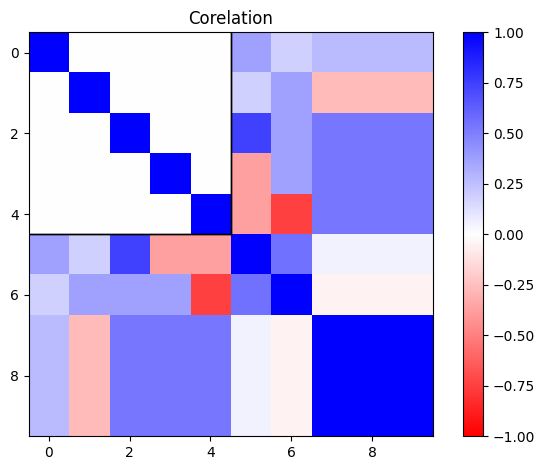

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Corelation'}>,
 <matplotlib.image.AxesImage at 0x7ebfab50e6b0>)

In [64]:
model.plot(result="rho", title="Corelation")

## <font color='green'> [3.2] Boxplot </font> 


You can open a window to display a graphic interface to study the influence of the fixation of a variable

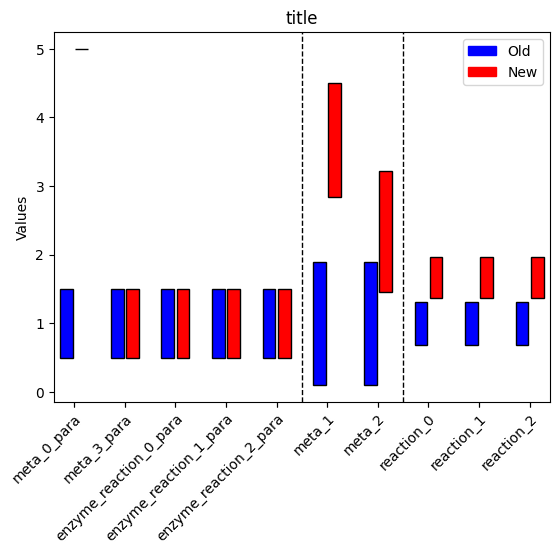

In [66]:
model.graphic_interface()

If you want to study the influence of mutliple fixation of elements, use .boxplot() or .group_entropy_fixed_vector insteed

## <font color='green'> [3.3] Eschermap </font> 


If you have a model file and a map file (both in .json), you can display things on a esher map

In [67]:
model_path = "../Exemples/linear/model_linear.json"
map_path = "../Exemples/linear/map_linear.json"

### <font color='white'> [3.3.1] Display the reference state </font> 

In [68]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 1.0, 'meta_1': 1.0, 'meta_2': 1.0, 'meta_3': 1.0}, metabolite_n…

### <font color='white'> [3.3.2] Display MI or correlation </font> 

You can display the mutual information or the correlation between every metabolites and a element of the model

In [70]:
model.escher_meta(studied="enzyme_reaction_1_para", result="rho", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 0.0, 'meta_1': -0.3713906763541039, 'meta_2': 0.371390676354103…

### <font color='white'> [3.3.3] Display mean deviation </font> 

You can also display on the escher map the mean deviation that occur when you fixe a element of the model

In [71]:
model.escher_mean_deviation(fixed_element="enzyme_reaction_1_para", fixed_value=1.5, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 0.0, 'meta_1': -0.33333333333333354, 'meta_2': 0.33333333333333…